In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


## Load Data

In [2]:
df = pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')

In [3]:
df.shape

(13580, 21)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## About data

In [9]:
df.info() #take care about datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [8]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [16]:
df.nunique() 

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

### Check each feature 

#### Inference 1
- We will drop columns: suburb, address, region name -> as all of them describe the location which represented by Lattitude and Longtitude

In [19]:
df['Method'].value_counts() # we will study it is relation by price later to,
# decide it is important or not  

Method
S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: count, dtype: int64

In [21]:
df['SellerG'].value_counts() 

SellerG
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: count, Length: 268, dtype: int64

#### Inference 2
- I think the name of  Real Estate Agent will not play a big role in house price, so i will not use it in my prediction

#### Inference 3
- sold date and date of building(i have the age of house) will not be use in prediction 


In [5]:
columns_will_drop = ['Suburb', 'Address', 'SellerG', 'Regionname', 'Date', 'YearBuilt', 'Postcode', 'Propertycount', 'CouncilArea']

## Data Cleaning 

### Drop unseful columns

In [6]:
df.drop(columns=columns_will_drop, inplace=True)

In [9]:
df.shape

(13580, 11)

In [10]:
df.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984
1,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934
2,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944
3,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,-37.7969,144.9969
4,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,-37.8072,144.9941


In [11]:
df['Price'].max(), df['Price'].min(), df['Price'].mean()

(9000000.0, 85000.0, 1075684.079455081)

In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=.2, random_state=33,shuffle=True)

### Deal with NaN values

In [10]:
train_df.isnull().sum()

Rooms          0
Type           0
Price          0
Method         0
Distance       0
Bedroom2       0
Bathroom       0
Car           46
Landsize       0
Lattitude      0
Longtitude     0
dtype: int64

In [11]:
test_df.isnull().sum()

Rooms          0
Type           0
Price          0
Method         0
Distance       0
Bedroom2       0
Bathroom       0
Car           16
Landsize       0
Lattitude      0
Longtitude     0
dtype: int64

In [7]:
build_land_size = df[['BuildingArea', 'Landsize']].dropna(subset=['BuildingArea', 'Landsize'])
build_land_size['free_area'] = build_land_size['BuildingArea'] -  build_land_size['Landsize']
build_land_size['abs_free_area'] = abs(build_land_size['free_area']) 
build_land_size.sample(10)

,BuildingArea,Landsize,free_area,abs_free_area
12063,129.0,534.0,-405.0,405.0
938,114.0,194.0,-80.0,80.0
2952,194.0,768.0,-574.0,574.0
6169,231.0,632.0,-401.0,401.0
9559,181.0,648.0,-467.0,467.0
3824,223.0,0.0,223.0,223.0
13340,131.0,553.0,-422.0,422.0
1754,250.0,283.0,-33.0,33.0
12737,200.0,587.0,-387.0,387.0
10615,72.0,0.0,72.0,72.0


In [52]:
mask = build_land_size['free_area'] < 0
mask.sum()
# => i have 1323 positive value and 5754 negative value

5754

In [58]:
 build_land_size['abs_free_area'].median()

239.5

#### Inference 4
- As land size and building area size are confusing features and  does not present any realistic value so i will drop building size 


In [8]:
df.drop(columns='BuildingArea', inplace= True)

In [12]:
train_df.shape

(10864, 11)

In [17]:
df['Car'].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [13]:
#fill car NaN
value = 1
train_df['Car'] = train_df['Car'].fillna(value)
test_df['Car'] = test_df['Car'].fillna(value)

print(value)

1


In [14]:
train_df.isnull().sum()

Rooms         0
Type          0
Price         0
Method        0
Distance      0
Bedroom2      0
Bathroom      0
Car           0
Landsize      0
Lattitude     0
Longtitude    0
dtype: int64

In [15]:
test_df.isnull().sum()

Rooms         0
Type          0
Price         0
Method        0
Distance      0
Bedroom2      0
Bathroom      0
Car           0
Landsize      0
Lattitude     0
Longtitude    0
dtype: int64

## EDA

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns

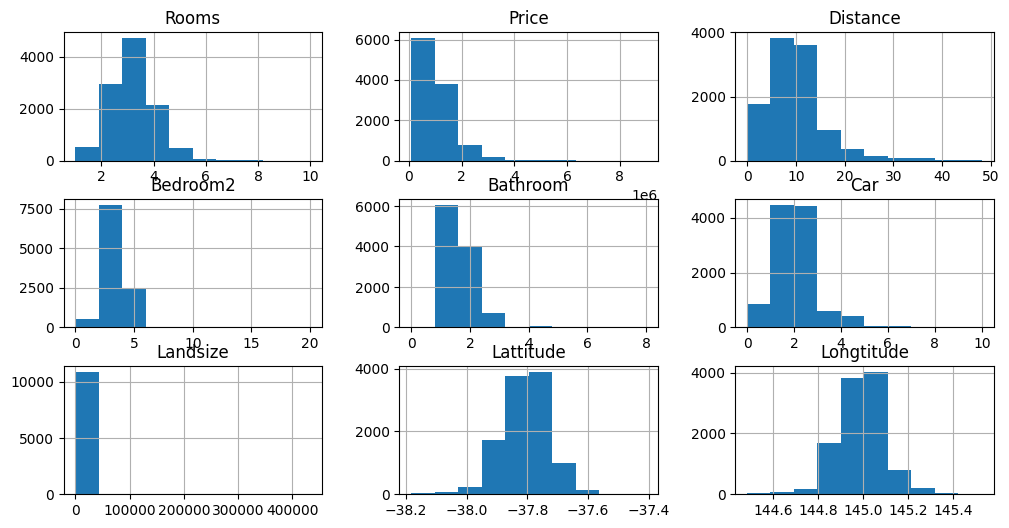

In [22]:
train_df.select_dtypes(exclude='object').hist(figsize=(12,6))
plt.show()

In [23]:
cor_matrix = train_df.select_dtypes(exclude='object').corr()

Text(0.5, 1.0, 'Numrical Features Correlation Heatmap')

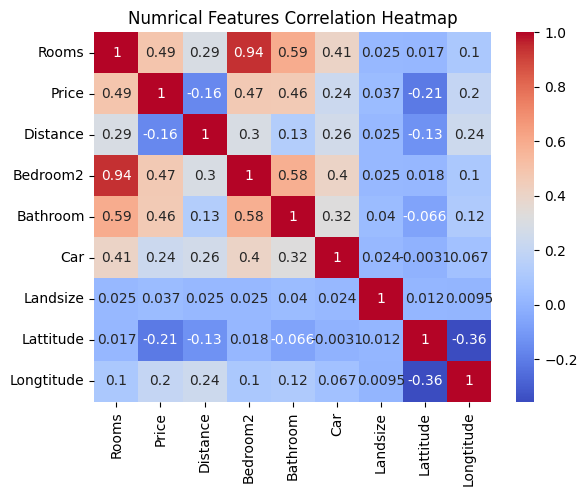

In [24]:
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')

plt.title('Numrical Features Correlation Heatmap')

In [97]:
train_df.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'Lattitude', 'Longtitude'],
      dtype='object')

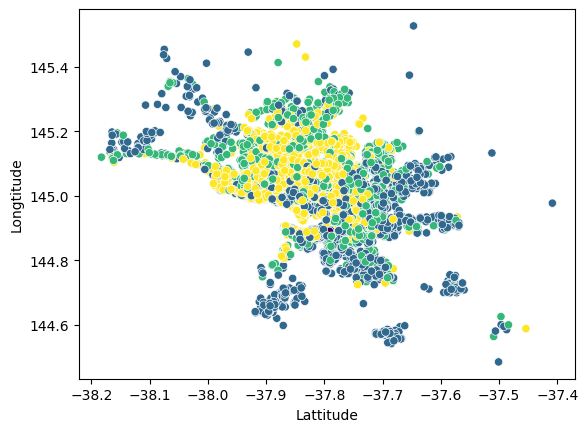

In [17]:
from matplotlib.colors import BoundaryNorm
import seaborn as sns

# Define custom boundaries for color splits
custom_boundaries = [50000, 200000, 700000, 1000000, 1500000]  # Define your own list of boundaries here

# Create BoundaryNorm object
hue_norm = BoundaryNorm(custom_boundaries, ncolors=256)
scatterplot = sns.scatterplot(data=train_df, x='Lattitude', y='Longtitude', hue='Price', palette='viridis', hue_norm=hue_norm, legend=False)

## Preprocessing Pipeline

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
# numeric data cleaner
numerical_transformer = SimpleImputer(strategy='mean')

# categorical pipline -> clean and one hot encoding 

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))       
])

# concatenate

data_preprocessing = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 2694 to 7188
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       10864 non-null  int64  
 1   Type        10864 non-null  object 
 2   Price       10864 non-null  float64
 3   Method      10864 non-null  object 
 4   Distance    10864 non-null  float64
 5   Bedroom2    10864 non-null  float64
 6   Bathroom    10864 non-null  float64
 7   Car         10864 non-null  float64
 8   Landsize    10864 non-null  float64
 9   Lattitude   10864 non-null  float64
 10  Longtitude  10864 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1018.5+ KB


In [51]:
numerical_cols = [col for col in train_df.select_dtypes(exclude='object').columns if col != 'Price']
categorical_cols = [col for col in train_df.select_dtypes(include='object').columns]

In [34]:
numerical_cols

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude']

In [22]:
categorical_cols

['Type', 'Method']

## Model

In [24]:
train_df.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'Lattitude', 'Longtitude'],
      dtype='object')

In [38]:
# Drop 'Price' column from X_train and X_valid
X_train = train_df.drop(columns=['Price'])
y_train = train_df['Price']
X_valid = test_df.drop(columns=['Price'])
y_valid = test_df['Price']


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define model
model = RandomForestRegressor(n_estimators=200)

# Preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', data_preprocessing),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'Lattitude', 'Longtitude'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Type', 'Method'], dtype='object'))])),
                ('model', RandomForestRegressor(n_estimators=200))])

In [44]:
# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 165110.11794135868


## Final Pipeline

In [45]:
from sklearn.model_selection import GridSearchCV

# Define a dictionary of parameters for grid search
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Print the best parameters found by grid search
print("Best parameters found by grid search:")
print(grid_search.best_params_)

# Preprocessing of validation data, get predictions using the best model
preds = best_model.predict(X_valid)

# Calculate and print mean absolute error
mae = mean_absolute_error(y_valid, preds)
print('MAE:', mae)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   2.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   2.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   2.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   2.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   2.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   4.6s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   4.6s
[CV] END model__max_depth